# Exercise 2.4 
Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

In [8]:
import numpy as np
import nsfg
import thinkstats2
import thinkplot

In [9]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

In [13]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [14]:
pregWeightFirsts = firsts.totalwgt_lb
pregWeightOthers = others.totalwgt_lb

first_hist = thinkstats2.Hist(np.floor(pregWeightFirsts), label='first')
other_hist = thinkstats2.Hist(np.floor(pregWeightOthers), label='other')

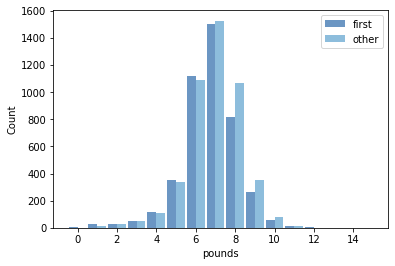

In [15]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='pounds', ylabel='Count')

In [19]:
meanDifference = pregWeightFirsts.mean() - pregWeightOthers.mean()
meanDifference

-0.12476118453549034

In [20]:
meanDifference / pregWeightFirsts.mean()

-0.017325308776419673

In [16]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [18]:
cohens_d = CohenEffectSize(pregWeightFirsts, pregWeightOthers)
cohens_d

-0.088672927072602